#Business Understanding
1. Membangun Model Random Forest untuk mengklasifikasi transaksi fraud dan mendeteksi pola hubungan mencurigakan antara buyer-seller

#Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pickle
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [2]:
transactions = pd.read_csv('/content/fact__paper__digital_payment_transaction.csv')
transactions

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,NaN,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,NaN,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,NaN,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,NaN,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,NaN,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498
...,...,...,...,...,...,...,...,...,...
49995,4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...,NaN,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285
49996,0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...,NaN,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481
49997,ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...,NaN,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016
49998,351da251d731cba588418e4a175460cc822ecbeb751751...,NaN,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821


In [3]:
companies = pd.read_csv('/content/dim__paper__company.csv')
companies

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58
...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,2021-12-10 13:27:41
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-05-30 16:28:48
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,2023-01-15 21:38:22
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,2021-10-30 17:50:55


In [4]:
print("Info Transaksi: \n")
transactions.info()

Info Transaksi: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dpt_id                        50000 non-null  object 
 1   dpt_promotion_id              937 non-null    object 
 2   buyer_id                      50000 non-null  object 
 3   seller_id                     50000 non-null  object 
 4   transaction_amount            50000 non-null  float64
 5   payment_method_name           50000 non-null  object 
 6   payment_provider_name         50000 non-null  object 
 7   transaction_created_datetime  50000 non-null  object 
 8   transaction_updated_datetime  50000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [5]:
print("Info Perusahaan: \n")
companies.info()

Info Perusahaan: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company_id                   50000 non-null  object 
 1   company_kyc_status_name      50000 non-null  object 
 2   company_kyb_status_name      50000 non-null  object 
 3   company_type_group           49999 non-null  object 
 4   company_phone_verified_flag  50000 non-null  float64
 5   company_email_verified_flag  50000 non-null  float64
 6   user_fraud_flag              50000 non-null  float64
 7   testing_account_flag         50000 non-null  float64
 8   blacklist_account_flag       50000 non-null  float64
 9   package_active_name          50000 non-null  object 
 10  company_registered_datetime  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


In [6]:
print("Info Deskripsi Transkasi: \n")
transactions.describe(include="all")

Info Deskripsi Transkasi: 



,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
count,50000,937,50000,50000,5.000000e+04,50000,50000,50000,50000
unique,50000,54,9527,3919,NaN,7,18,50000,50000
top,92d95f3d611448773498126f6d39da75c90d2d383c42b2...,promotion-219036467,0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,NaN,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-16 23:47:44.746299,2023-05-16 23:47:44.746299
freq,1,243,1266,26016,NaN,33156,21855,1,1
mean,NaN,NaN,NaN,NaN,1.965125e+07,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.057004e+08,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,7.000043e+04,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.850172e+06,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.398597e+07,NaN,NaN,NaN,NaN


In [7]:
print("Info Deskripsi Perusahaan: \n")
companies.describe(include="all")

Info Deskripsi Perusahaan: 



,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
count,50000,50000,50000,49999,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000
unique,9527,6,6,6,NaN,NaN,NaN,NaN,NaN,13,9501
top,0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,NaN,NaN,NaN,NaN,NaN,FREE,2022-04-13 05:30:45
freq,1266,35191,36852,40764,NaN,NaN,NaN,NaN,NaN,33349,1266
mean,NaN,NaN,NaN,NaN,0.966280,0.892120,0.153000,0.023080,0.000760,NaN,NaN
std,NaN,NaN,NaN,NaN,0.180509,0.310232,0.359991,0.150159,0.027558,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN


# Data Preparation

## Data Cleaning

In [8]:
transactions.drop_duplicates(inplace=True)
companies.drop_duplicates(inplace=True)

In [9]:
transactions['dpt_promotion_id'] = transactions['dpt_promotion_id'].fillna("NO_PROMO")
companies[['company_email_verified_flag','company_phone_verified_flag']] = \
    companies[['company_email_verified_flag','company_phone_verified_flag']].fillna(0)

In [10]:
transactions = transactions[transactions['transaction_amount'] > 0]
transactions = transactions[
    transactions['transaction_updated_datetime'] >= transactions['transaction_created_datetime']
]

In [11]:
print("Jumlah transaksi setelah cleaning:", transactions.shape[0])
print("Jumlah perusahaan setelah cleaning:", companies.shape[0])

print("\nJumlah missing value setelah cleaning:")
print(transactions.isnull().sum())

print("\nContoh data transaksi setelah cleaning:")
print(transactions.head())

Jumlah transaksi setelah cleaning: 49974
Jumlah perusahaan setelah cleaning: 9527

Jumlah missing value setelah cleaning:
dpt_id                          0
dpt_promotion_id                0
buyer_id                        0
seller_id                       0
transaction_amount              0
payment_method_name             0
payment_provider_name           0
transaction_created_datetime    0
transaction_updated_datetime    0
dtype: int64

Contoh data transaksi setelah cleaning:
                                              dpt_id dpt_promotion_id  \
0  69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...         NO_PROMO   
1  961d6f7efde3622da8f35e76e2b53acd84c647a661de86...         NO_PROMO   
2  6441defc089b4ae947cce529904a5c7db2326ede52bdaa...         NO_PROMO   
3  64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...         NO_PROMO   
4  ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...         NO_PROMO   

                                            buyer_id  \
0  bbce610a3267808752a7

## Explarotary Data Analysis

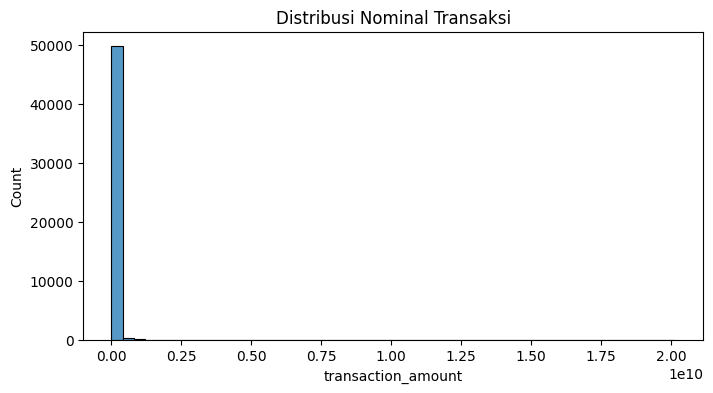

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(transactions["transaction_amount"], bins=50)
plt.title("Distribusi Nominal Transaksi")
plt.show()

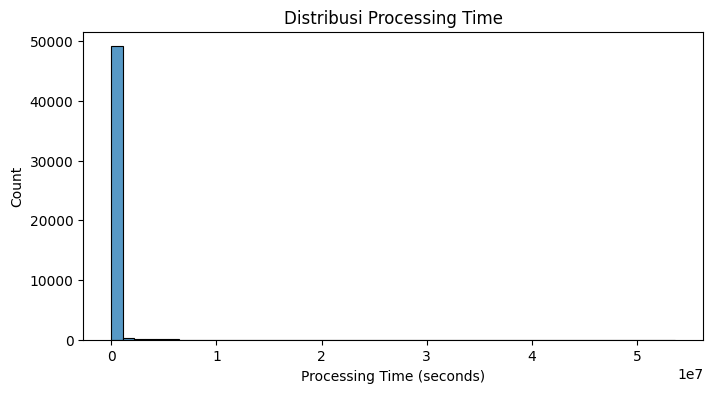

In [13]:
plt.figure(figsize=(8,4))

processing_time = (
    pd.to_datetime(transactions["transaction_updated_datetime"]) -
    pd.to_datetime(transactions["transaction_created_datetime"])
).dt.total_seconds()

sns.histplot(processing_time, bins=50)

plt.title("Distribusi Processing Time")
plt.xlabel("Processing Time (seconds)")
plt.show()

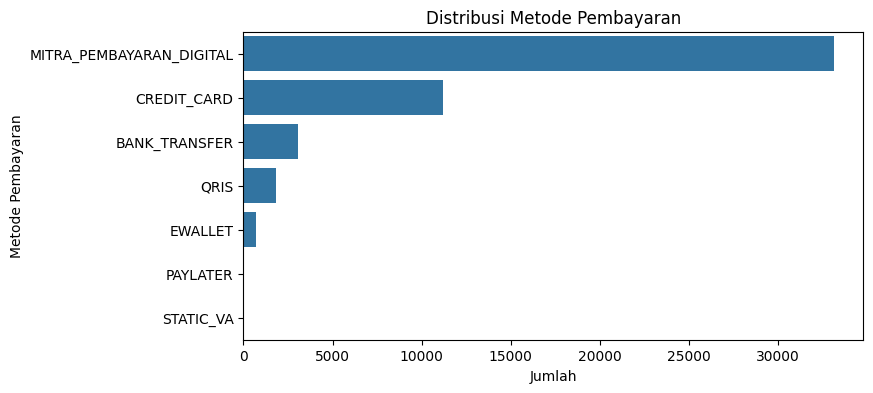

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(y=transactions["payment_method_name"], order=transactions["payment_method_name"].value_counts().index)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Jumlah")
plt.ylabel("Metode Pembayaran")
plt.show()

## Data Integration

In [15]:
buyer_fraud = companies.set_index("company_id")["user_fraud_flag"].to_dict()
seller_fraud = companies.set_index("company_id")["user_fraud_flag"].to_dict()

transactions["buyer_fraud_flag"] = transactions["buyer_id"].map(buyer_fraud)
transactions["seller_fraud_flag"] = transactions["seller_id"].map(seller_fraud)

In [16]:
comp_features = companies[[
    "company_id",
    "user_fraud_flag",
    "blacklist_account_flag",
    "company_kyc_status_name"
]]

In [17]:
transactions["buyer_kyc"] = transactions["buyer_id"].map(
    comp_features.set_index("company_id")["company_kyc_status_name"]
)

In [18]:
transactions[[
    "buyer_id",
    "seller_id",
    "buyer_fraud_flag",
    "seller_fraud_flag",
    "buyer_kyc"
]].head(10)
print(transactions[["buyer_fraud_flag", "seller_fraud_flag", "buyer_kyc"]].info())
print(transactions[["buyer_fraud_flag", "seller_fraud_flag", "buyer_kyc"]].isna().sum())
transactions[["buyer_id", "seller_id", "buyer_fraud_flag", "seller_fraud_flag", "buyer_kyc"]].head()


<class 'pandas.core.frame.DataFrame'>
Index: 49974 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buyer_fraud_flag   49974 non-null  float64
 1   seller_fraud_flag  49468 non-null  float64
 2   buyer_kyc          49974 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.5+ MB
None
buyer_fraud_flag       0
seller_fraud_flag    506
buyer_kyc              0
dtype: int64


,buyer_id,seller_id,buyer_fraud_flag,seller_fraud_flag,buyer_kyc
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1.0,0.0,AKUN_DIBEKUKAN
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.0,0.0,BELUM_VALIDASI
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.0,0.0,BELUM_VALIDASI
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,0.0,0.0,BELUM_VALIDASI
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,0.0,0.0,VALIDASI_BERHASIL


## Feature Engineering

In [19]:
transactions["processing_seconds"] = (
    pd.to_datetime(transactions["transaction_updated_datetime"]) -
    pd.to_datetime(transactions["transaction_created_datetime"])
).dt.total_seconds()

In [20]:
transactions["buyer_seller_tx_count"] = (
    transactions.groupby(["buyer_id", "seller_id"]).cumcount() + 1
)

In [21]:
transactions["buyer_total_tx"] = transactions.groupby("buyer_id").cumcount() + 1

In [22]:
transactions["buyer_avg_amount"] = transactions.groupby("buyer_id")["transaction_amount"].transform("mean")

In [23]:
transactions["buyer_promo_count"] = (
    transactions.groupby("buyer_id")["dpt_promotion_id"]
    .transform(lambda x: (x != "NO_PROMO").sum())
)

In [24]:
transactions["seller_total_tx"] = transactions.groupby("seller_id").cumcount() + 1

In [25]:
transactions["seller_repeat_buyer"] = (
    transactions.groupby(["seller_id", "buyer_id"]).cumcount() + 1
)

In [26]:
fraud_dict = companies.set_index("company_id")["user_fraud_flag"].to_dict()

transactions["fraud_label"] = (
    (transactions["buyer_id"].map(fraud_dict) == 1) |
    (transactions["seller_id"].map(fraud_dict) == 1)
).astype(int)


In [27]:
drop_kyc = [
    "buyer_kyc",
    "buyer_kyb",
    "seller_kyc",
    "seller_kyb"
]

transactions = transactions.drop(columns=[col for col in drop_kyc if col in transactions.columns])


In [28]:
encoder_method = LabelEncoder()
encoder_provider = LabelEncoder()

transactions["payment_method_name"] = encoder_method.fit_transform(
    transactions["payment_method_name"].astype(str)
)

transactions["payment_provider_name"] = encoder_provider.fit_transform(
    transactions["payment_provider_name"].astype(str)
)


In [29]:
fraud_dict = companies.set_index("company_id")["user_fraud_flag"].to_dict()

transactions["fraud_label"] = (
    (transactions["buyer_id"].map(fraud_dict) == 1) |
    (transactions["seller_id"].map(fraud_dict) == 1)
).astype(int)


In [30]:
transactions["rule_big_amount"] = (
    transactions["transaction_amount"] >
    (transactions["buyer_avg_amount"] * 3)
)

In [31]:
transactions["rule_fast"] = (transactions["processing_seconds"] < 1)

In [32]:
transactions["rule_new_buyer_big_tx"] = (
    (transactions["buyer_total_tx"] == 1) &
    (transactions["transaction_amount"] > 10000000)
)

In [33]:
transactions["rule_abnormal_ratio"] = (
    (transactions["buyer_total_tx"] + 1) /
    (transactions["seller_total_tx"] + 1)
) > 50

In [34]:
transactions["rule_promo_abuse"] = (
    transactions["buyer_promo_count"] > 10
)

In [35]:
transactions["fraud_label"] = (
    (transactions["buyer_id"].map(fraud_dict) == 1) |
    (transactions["seller_id"].map(fraud_dict) == 1) |
    (transactions["rule_big_amount"]) |
    (transactions["rule_fast"]) |
    (transactions["rule_new_buyer_big_tx"]) |
    (transactions["rule_abnormal_ratio"]) |
    (transactions["rule_promo_abuse"])
).astype(int)


In [36]:
fe_cols = [
    "processing_seconds",
    "buyer_seller_tx_count",
    "buyer_total_tx",
    "buyer_avg_amount",
    "buyer_promo_count",
    "seller_total_tx",
    "seller_repeat_buyer",
    "rule_big_amount",
    "rule_fast",
    "rule_new_buyer_big_tx",
    "rule_abnormal_ratio",
    "rule_promo_abuse",
    "fraud_label"
]

transactions[fe_cols].head(10)


,processing_seconds,buyer_seller_tx_count,buyer_total_tx,buyer_avg_amount,buyer_promo_count,seller_total_tx,seller_repeat_buyer,rule_big_amount,rule_fast,rule_new_buyer_big_tx,rule_abnormal_ratio,rule_promo_abuse,fraud_label
0,5043.577623,1,1,2.038000e+04,0,1,1,False,False,False,False,False,1
1,52.850660,1,1,2.492631e+04,0,2,1,False,False,False,False,False,0
2,90119.798776,1,1,3.083827e+05,0,3,1,True,False,False,False,False,1
3,373.462107,1,1,2.982871e+04,0,1,1,False,False,False,False,False,0
4,30.486774,1,1,6.714313e+05,0,1,1,False,False,False,False,False,0
5,172.572909,1,1,2.236725e+07,0,1,1,False,False,False,False,False,0
6,12845.964444,1,1,8.243013e+04,0,1,1,False,False,False,False,False,0
7,62.535180,1,1,1.287488e+05,0,4,1,False,False,False,False,False,0
8,90.665296,1,1,9.946551e+05,0,5,1,False,False,False,False,False,0
9,3936.042424,1,1,2.612467e+07,0,1,1,False,False,True,False,False,1


In [37]:
transactions[fe_cols].describe()


,processing_seconds,buyer_seller_tx_count,buyer_total_tx,buyer_avg_amount,buyer_promo_count,seller_total_tx,seller_repeat_buyer,fraud_label
count,4.997400e+04,49974.000000,49974.000000,4.997400e+04,49974.000000,49974.000000,49974.000000,49974.000000
mean,9.583680e+04,34.620643,37.517549,1.966147e+07,0.195081,6787.358026,34.620643,0.294053
std,8.868330e+05,118.650155,122.206622,1.001789e+08,0.642687,8430.144330,118.650155,0.455620
min,0.000000e+00,1.000000,1.000000,7.500000e+02,0.000000,1.000000,1.000000,0.000000
25%,6.276670e+01,2.000000,2.000000,1.410136e+05,0.000000,10.000000,2.000000,0.000000
50%,1.376380e+02,5.000000,6.000000,3.942662e+06,0.000000,1135.500000,5.000000,0.000000
75%,1.277637e+03,18.000000,19.000000,1.695536e+07,0.000000,13497.750000,18.000000,1.000000
max,5.362127e+07,1266.000000,1266.000000,2.014010e+10,8.000000,25991.000000,1266.000000,1.000000


In [38]:
print("Rule Big Amount :", transactions["rule_big_amount"].sum())
print("Rule Fast :", transactions["rule_fast"].sum())
print("Rule New Buyer Big TX :", transactions["rule_new_buyer_big_tx"].sum())
print("Rule Abnormal Ratio :", transactions["rule_abnormal_ratio"].sum())
print("Rule Promo Abuse :", transactions["rule_promo_abuse"].sum())

print("\nTotal Fraud Label:", transactions["fraud_label"].value_counts())


Rule Big Amount : 1349
Rule Fast : 4679
Rule New Buyer Big TX : 2877
Rule Abnormal Ratio : 6
Rule Promo Abuse : 0

Total Fraud Label: fraud_label
0    35279
1    14695
Name: count, dtype: int64


## Data Transformation

In [39]:

scale_cols = [
    "transaction_amount",
    "processing_seconds",
    "buyer_avg_amount",
]

scaler = StandardScaler()
transactions[scale_cols] = scaler.fit_transform(transactions[scale_cols])
print("=== Hasil Scaling Kolom Numerik ===")
transactions[scale_cols].head(10)


=== Hasil Scaling Kolom Numerik ===


,transaction_amount,processing_seconds,buyer_avg_amount
0,-0.185774,-0.102380,-0.196062
1,-0.185828,-0.108008,-0.196017
2,-0.176390,-0.006447,-0.193187
3,-0.185683,-0.107646,-0.195968
4,-0.176508,-0.108033,-0.189563
5,-0.178097,-0.107873,0.027010
6,-0.185872,-0.093582,-0.195443
7,-0.185862,-0.107997,-0.194980
8,-0.180209,-0.107965,-0.186337
9,-0.048682,-0.103629,0.064517


## Data Labeling

In [40]:
to_drop = [
    "transaction_created_datetime",
    "transaction_updated_datetime",
    "buyer_id",
    "seller_id",
    "dpt_id",
    "buyer_fraud_flag",
    "seller_fraud_flag",
    "dpt_promotion_id"
]

df_model = transactions.drop(columns=[col for col in to_drop if col in transactions.columns])
print("=== Kolom Setelah Drop ===")
print(df_model.columns)


=== Kolom Setelah Drop ===
Index(['transaction_amount', 'payment_method_name', 'payment_provider_name',
       'processing_seconds', 'buyer_seller_tx_count', 'buyer_total_tx',
       'buyer_avg_amount', 'buyer_promo_count', 'seller_total_tx',
       'seller_repeat_buyer', 'fraud_label', 'rule_big_amount', 'rule_fast',
       'rule_new_buyer_big_tx', 'rule_abnormal_ratio', 'rule_promo_abuse'],
      dtype='object')


# Modeling

In [41]:
X = df_model.drop(columns=["fraud_label"])
y = df_model["fraud_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
X_test_over, y_test_over = sm.fit_resample(X_test, y_test)

print("Train sebelum:", y_train.value_counts())
print("Train sesudah:", y_train_over.value_counts())

print("Test sebelum:", y_test.value_counts())
print("Test sesudah:", y_test_over.value_counts())

Train sebelum: fraud_label
0    26459
1    11021
Name: count, dtype: int64
Train sesudah: fraud_label
0    26459
1    26459
Name: count, dtype: int64
Test sebelum: fraud_label
0    8820
1    3674
Name: count, dtype: int64
Test sesudah: fraud_label
1    8820
0    8820
Name: count, dtype: int64


In [43]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_over, y_train_over)



RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [44]:


y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9161997758924284

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      8820
           1       0.90      0.81      0.85      3674

    accuracy                           0.92     12494
   macro avg       0.91      0.88      0.90     12494
weighted avg       0.92      0.92      0.91     12494


Confusion Matrix:
 [[8489  331]
 [ 716 2958]]


                  feature  importance
11              rule_fast    0.178214
3      processing_seconds    0.152324
6        buyer_avg_amount    0.148402
0      transaction_amount    0.146878
12  rule_new_buyer_big_tx    0.078450
8         seller_total_tx    0.059169
10        rule_big_amount    0.057645
5          buyer_total_tx    0.044703
4   buyer_seller_tx_count    0.034654
9     seller_repeat_buyer    0.032660
2   payment_provider_name    0.030012
1     payment_method_name    0.019277
7       buyer_promo_count    0.017425
13    rule_abnormal_ratio    0.000186
14       rule_promo_abuse    0.000000


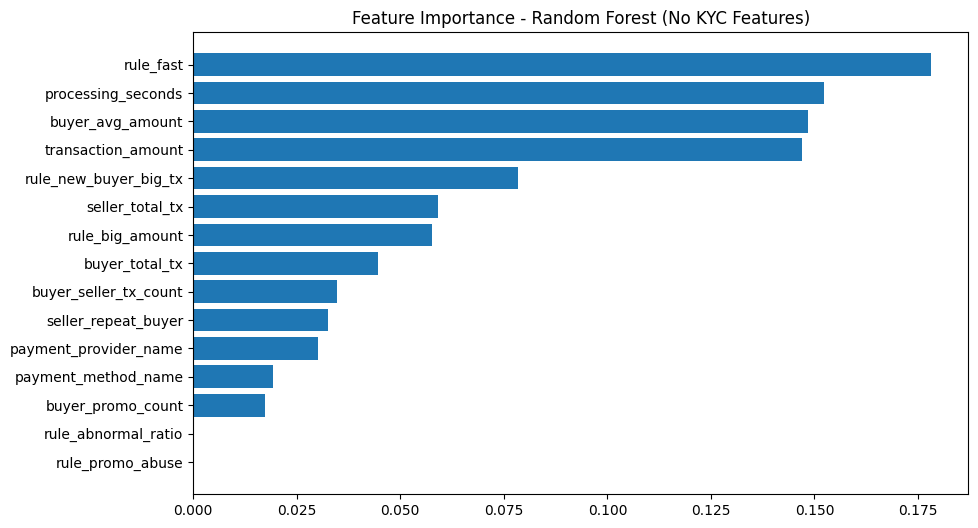

In [45]:

importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance)

plt.figure(figsize=(10,6))
plt.barh(importance['feature'], importance['importance'])
plt.title("Feature Importance - Random Forest (No KYC Features)")
plt.gca().invert_yaxis()
plt.show()


In [46]:

param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=2,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)

rs.fit(X_train_over, y_train_over)

best_rf = rs.best_estimator_


Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [47]:
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8820
           1       0.90      0.81      0.85      3674

    accuracy                           0.92     12494
   macro avg       0.91      0.89      0.90     12494
weighted avg       0.92      0.92      0.92     12494



#Simpan Model

In [48]:
model_bundle = {
    "model": best_rf,
    "encoder_method": encoder_method,
    "encoder_provider": encoder_provider,
    "scaler": scaler,
    "feature_columns": X_train.columns.tolist()
}

In [49]:

pickle.dump(model_bundle, open("rf_fraud_model.pkl", "wb"))

## Testing Model

In [50]:
with open("rf_fraud_model.pkl", "rb") as f:
    model_bundle = pickle.load(f)

model = model_bundle["model"]
encoder_method = model_bundle["encoder_method"]
encoder_provider = model_bundle["encoder_provider"]
scaler = model_bundle["scaler"]
feature_columns = model_bundle["feature_columns"]


In [51]:
test_input = {
    "transaction_amount": 200000000,
    "payment_method_name": "MITRA_PEMBAYARAN_DIGITAL",
    "payment_provider_name": "TOKOPEDIA",
    "processing_seconds": 0.01,
    "buyer_seller_tx_count": 100,
    "buyer_total_tx": 1,
    "buyer_avg_amount": 5000,
    "buyer_promo_count": 20,
    "seller_total_tx": 10000,
    "seller_repeat_buyer": 200
}


In [52]:
df_input = pd.DataFrame([test_input])

df_input["payment_method_name"] = encoder_method.transform(df_input["payment_method_name"])
df_input["payment_provider_name"] = encoder_provider.transform(df_input["payment_provider_name"])

df_input["rule_big_amount"] = (
    df_input["transaction_amount"] > (df_input["buyer_avg_amount"] * 3)
)

df_input["rule_fast"] = (df_input["processing_seconds"] < 1)

df_input["rule_new_buyer_big_tx"] = (
    (df_input["buyer_total_tx"] == 1) &
    (df_input["transaction_amount"] > 10000000)
)

df_input["rule_abnormal_ratio"] = (
    (df_input["buyer_total_tx"] + 1) /
    (df_input["seller_total_tx"] + 1)
) > 50

df_input["rule_promo_abuse"] = (
    df_input["buyer_promo_count"] > 10
)

scale_cols = ["transaction_amount", "processing_seconds", "buyer_avg_amount"]
df_input[scale_cols] = scaler.transform(df_input[scale_cols])

df_input = df_input[feature_columns]
df_input


,transaction_amount,payment_method_name,payment_provider_name,processing_seconds,buyer_seller_tx_count,buyer_total_tx,buyer_avg_amount,buyer_promo_count,seller_total_tx,seller_repeat_buyer,rule_big_amount,rule_fast,rule_new_buyer_big_tx,rule_abnormal_ratio,rule_promo_abuse
0,1.705718,3,14,-0.108067,100,1,-0.196216,20,10000,200,True,True,True,False,True


In [53]:
def predict_fraud(model, df_input, threshold=0.30):

    prob = model.predict_proba(df_input)[0][1]

    pred = 1 if prob >= threshold else 0

    return pred, prob


In [54]:
pred, prob = predict_fraud(model, df_input, threshold=0.30)

print("Prediction:", pred)
print("Fraud Probability:", prob)
print("======= HASIL PREDIKSI =======")

if pred == 1:
    print("⚠️  Transaksi ini berpotensi FRAUD.")
else:
    print("✅  Transaksi aman / normal.")

print(f"📊 Probabilitas fraud: {prob:.2f}")


Prediction: 1
Fraud Probability: 1.0
======= HASIL PREDIKSI =======
⚠️  Transaksi ini berpotensi FRAUD.
📊 Probabilitas fraud: 1.00
